# Sales and Customer Analytics — EDA & ML Prediction

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("synthetic_sales_data.csv")

In [3]:
df.head()

,OrderID,CustomerID,Product,Category,Quantity,Price,TotalSales,OrderDate,Region,PaymentMethod
0,ORD00001,CUST1131,Mixer,Home & Kitchen,4,4500,18000,2023-09-28,Central,Debit Card
1,ORD00002,CUST1639,Beverages,Grocery,5,300,1500,2023-01-21,North,UPI
2,ORD00003,CUST1239,Cookware Set,Home & Kitchen,2,6000,12000,2024-04-11,South,Cash
3,ORD00004,CUST2136,Jeans,Fashion,3,2000,6000,2024-04-03,West,UPI
4,ORD00005,CUST0131,T-Shirt,Fashion,5,800,4000,2023-04-10,South,UPI


In [4]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        12000 non-null  object        
 1   CustomerID     12000 non-null  object        
 2   Product        12000 non-null  object        
 3   Category       12000 non-null  object        
 4   Quantity       12000 non-null  int64         
 5   Price          12000 non-null  int64         
 6   TotalSales     12000 non-null  int64         
 7   OrderDate      12000 non-null  datetime64[ns]
 8   Region         12000 non-null  object        
 9   PaymentMethod  12000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 937.6+ KB


In [6]:
df.describe()

,Quantity,Price,TotalSales,OrderDate
count,12000.000000,12000.000000,12000.000000,12000
mean,3.007500,6473.708333,19430.266667,2023-12-31 05:41:52.800000
min,1.000000,300.000000,300.000000,2023-01-01 00:00:00
25%,2.000000,1200.000000,3200.000000,2023-07-01 00:00:00
50%,3.000000,3000.000000,8000.000000,2023-12-31 00:00:00
75%,4.000000,4500.000000,17500.000000,2024-07-02 00:00:00
max,5.000000,55000.000000,275000.000000,2024-12-30 00:00:00
std,1.415195,11682.644960,39583.800795,NaN


In [7]:
df.isna().sum()

,0
OrderID,0
CustomerID,0
Product,0
Category,0
Quantity,0
Price,0
TotalSales,0
OrderDate,0
Region,0
PaymentMethod,0


In [8]:
# Feature Engineering
df['Month'] = df['OrderDate'].dt.month
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

df.head()

,OrderID,CustomerID,Product,Category,Quantity,Price,TotalSales,OrderDate,Region,PaymentMethod,Month,DayOfWeek
0,ORD00001,CUST1131,Mixer,Home & Kitchen,4,4500,18000,2023-09-28,Central,Debit Card,9,Thursday
1,ORD00002,CUST1639,Beverages,Grocery,5,300,1500,2023-01-21,North,UPI,1,Saturday
2,ORD00003,CUST1239,Cookware Set,Home & Kitchen,2,6000,12000,2024-04-11,South,Cash,4,Thursday
3,ORD00004,CUST2136,Jeans,Fashion,3,2000,6000,2024-04-03,West,UPI,4,Wednesday
4,ORD00005,CUST0131,T-Shirt,Fashion,5,800,4000,2023-04-10,South,UPI,4,Monday


In [9]:
total_sales = df['TotalSales'].sum()
total_orders = df['OrderID'].nunique()
total_customers = df['CustomerID'].nunique()

total_sales, total_orders, total_customers


(np.int64(233163200), 12000, 2470)

# Revenue & Sales Performance Insights
Overall Business Health

In [10]:
total_revenue = df['TotalSales'].sum()
total_orders = df['OrderID'].nunique()
total_customers = df['CustomerID'].nunique()
avg_order_value = total_revenue / total_orders

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value:", round(avg_order_value, 2))

Total Revenue: 233163200
Total Orders: 12000
Total Customers: 2470
Average Order Value: 19430.27


Seasonal Sales Trends

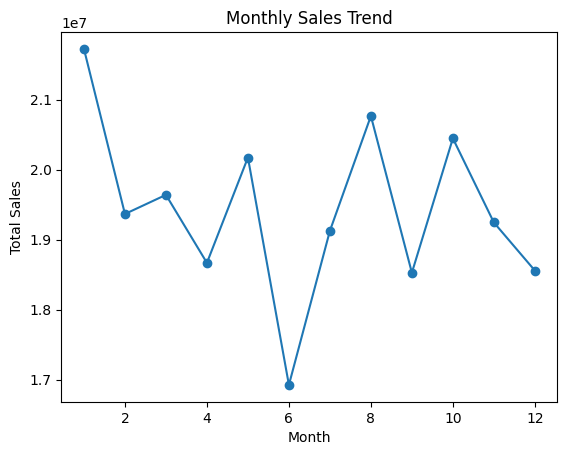

In [11]:
monthly_sales = df.groupby('Month')['TotalSales'].sum()

monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Product & Category Insights
Top Performing Categories

In [12]:
category_revenue = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)
category_orders = df.groupby('Category')['OrderID'].count()

display(pd.DataFrame({
    "Total Revenue": category_revenue,
    "Total Orders": category_orders
}))

,Total Revenue,Total Orders
Category,,
Beauty,20815000,2045
Electronics,144372000,2054
Fashion,14907500,1945
Grocery,5163100,1977
Home & Kitchen,37632000,1916
Sports,10273600,2063


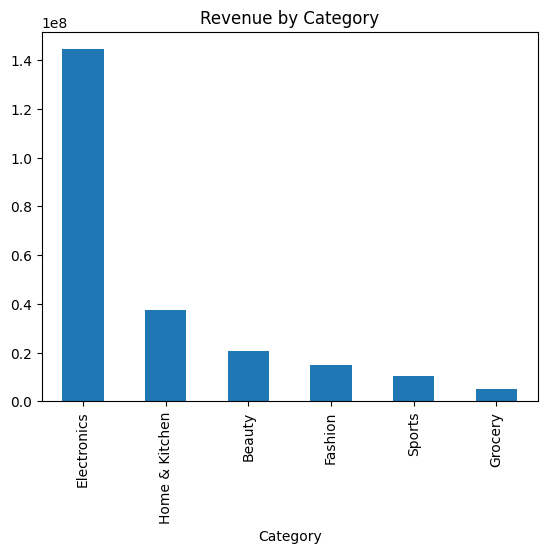

In [13]:
category_revenue.plot(kind='bar', title="Revenue by Category")
plt.show()

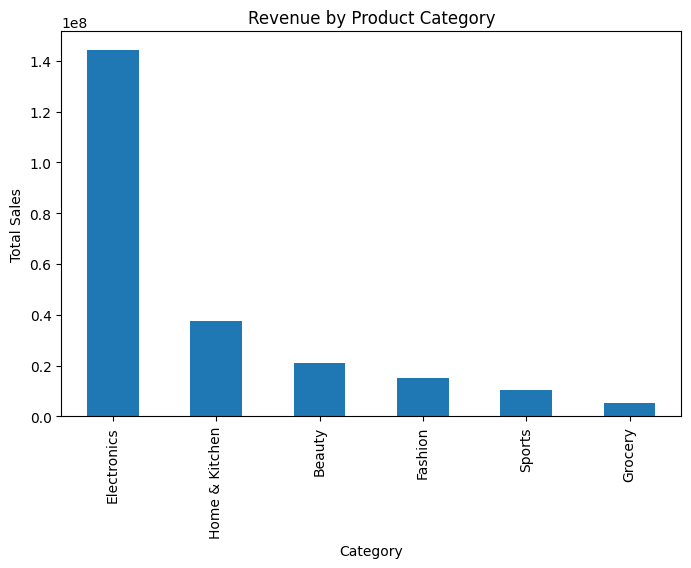

In [14]:
category_sales = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', figsize=(8,5))
plt.title("Revenue by Product Category")
plt.ylabel("Total Sales")
plt.show()

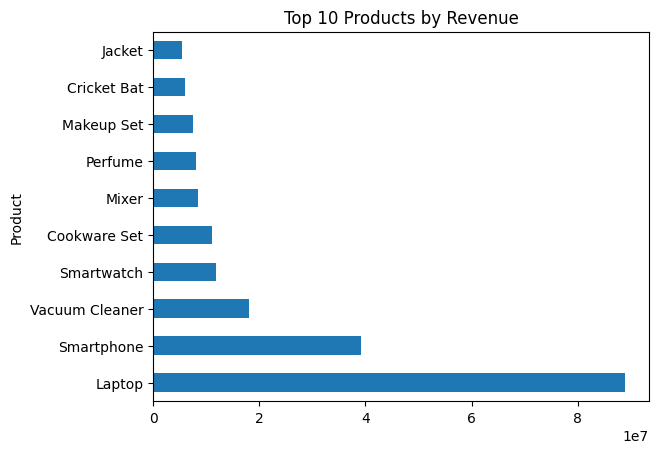

In [15]:
top_products = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh')
plt.title("Top 10 Products by Revenue")
plt.show()

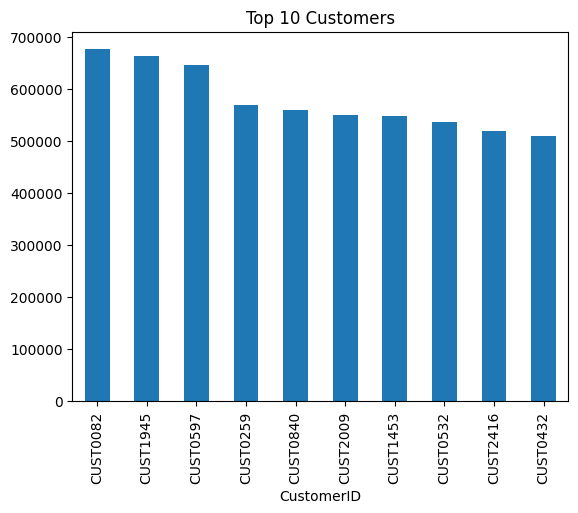

In [16]:
customer_sales = df.groupby('CustomerID')['TotalSales'].sum()

customer_sales.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Customers")
plt.show()

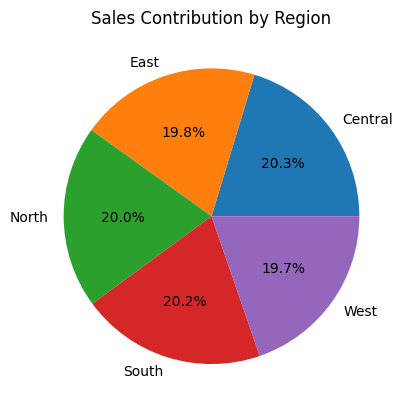

In [17]:
region_sales = df.groupby('Region')['TotalSales'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Contribution by Region")
plt.ylabel("")
plt.show()

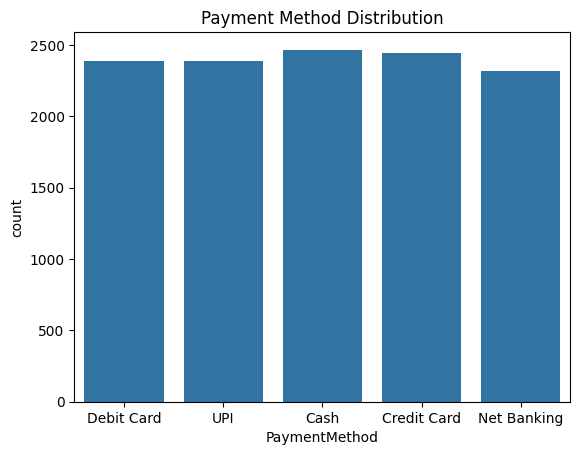

In [18]:
sns.countplot(data=df, x='PaymentMethod')
plt.title("Payment Method Distribution")
plt.show()

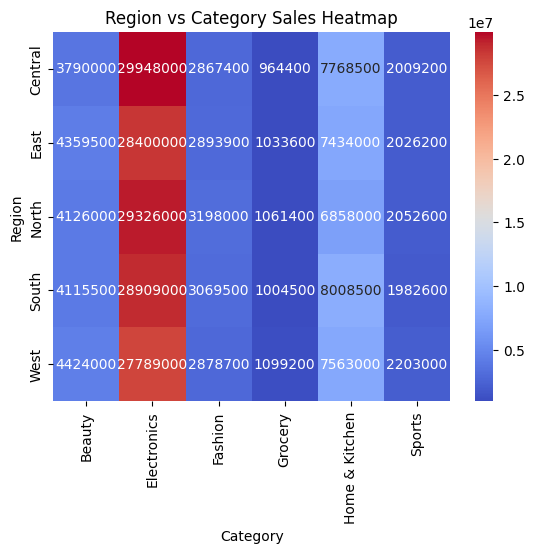

In [19]:
pivot = pd.pivot_table(
    df,
    values='TotalSales',
    index='Region',
    columns='Category',
    aggfunc='sum'
)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Region vs Category Sales Heatmap")
plt.show()

# ML

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [39]:
features = df[['Category', 'Region', 'PaymentMethod', 'Quantity', 'Month']]
target = df['TotalSales']

In [38]:
# One-hot encoding
X = pd.get_dummies(features, drop_first=True)
y = target

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
# Model
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [42]:
# Train
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Predict
y_pred = model.predict(X_test)

In [44]:
# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.43417203400764504
MAE: 12564.081430095368
RMSE: 32406.476623564882


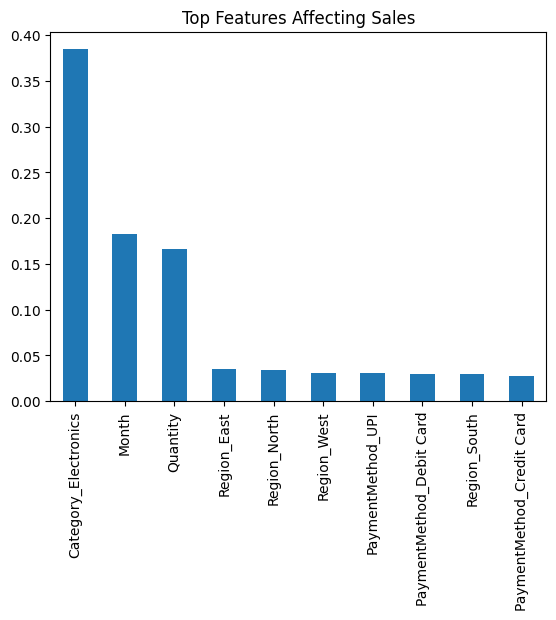

In [45]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Features Affecting Sales")
plt.show()

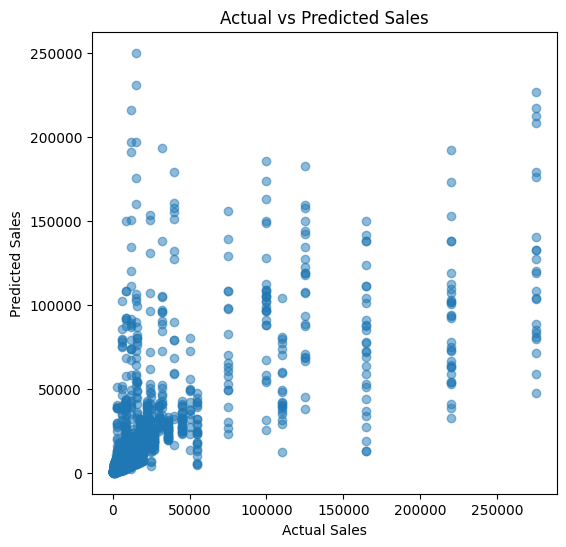

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()